In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
class WordSpeechRecognition:
    def __init__(self):
        self.data = []
        self.info = []
    
    def dataSet(self, __talker, __talkNum):
        __talker = str(__talker)
        __talkNum = str(__talkNum)
        for __wordNum in range(100):
            __fileName = "city0" + __talker + __talkNum + "/city0" + __talker + __talkNum + "_" + "{:0=3}".format(__wordNum + 1) + ".txt"
            __f = open(__fileName)
            __textList = __f.read().split() # データ読み込み

            self.info.append(__textList[0 : 3]) # 情報部分抽出
            __frame = int(__textList[2]) # フレーム数格納
            __strData = __textList[3 : len(__textList)] # データ部分抽出
            __numData = list(map(float, __strData)) # floatに変換
            __arrayData = np.array(__numData) # 行列にする

            __tempData = list(np.reshape(__arrayData, (__frame, 15))) # データをフレームごとに分ける
            self.data.append(__tempData) # 100個の行列のリストを作る
            
        __f.close()
        return self.data, self.info
        
    def CalcDistance(self, __wordNum1, __wordNum2, __data1, __data2):        
        line = int(__data1[1][__wordNum1][2])
        row = int(__data2[1][__wordNum2][2])
        self.d = np.zeros((line, row))
        
        for i in range(line):
            for j in range(row):
                sum = 0
                for k in range(15):
                    sum += (__data1[0][__wordNum1][i][k] - __data2[0][__wordNum2][j][k]) ** 2
                self.d[i][j] = math.sqrt(sum)

        return self.d
                
    def DPmatching(self):
        pass

In [76]:
wsr1 = WordSpeechRecognition()
wsr2 = WordSpeechRecognition()
data1 = wsr1.dataSet(1, 1)
data2 = wsr2.dataSet(1, 2)

In [91]:
print(data1[1][1]) 
print(data2[1][88])

['city011_002', 'IKEBUKURO', '85']
['city012_089', 'GYANGU', '64']


In [94]:
d = wsr.CalcDistance(1, 88, data1, data2) # (word1, word2)

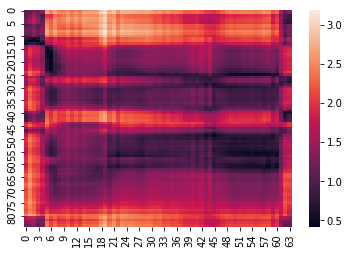

In [95]:
sns.heatmap(d)